In [198]:
#Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [199]:
#Loading the data and making a copy
data= pd.read_csv("data1.csv", sep=";")
data2= data[:]
data.head(10)

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0
5,118,510,3918027,yes,no,0,223,38,19,98,221,101,"203,9",118,"9,18","6,3",6,"1,7",0,0
6,121,510,3559993,no,yes,24,218,37,30,88,349,108,"212,6",118,"9,57","7,5",7,"2,03",3,0
7,147,415,3299001,yes,no,0,157,27,9,79,103,94,"211,8",96,"9,53","7,1",6,"1,92",0,0
8,117,408,3354719,no,no,0,185,31,30,97,352,80,"215,8",90,"9,71","8,7",4,"2,35",1,0
9,141,415,3308173,yes,yes,37,259,44,19,84,222,111,"326,4",97,"14,69","11,2",5,"3,02",0,0


In [200]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

In [201]:
#data.isnull().sum()

In [202]:
#Checking for total no of columns and rows
data.shape

(3333, 20)

In [203]:
data.describe()

,account length,location code,user id,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,sale product views,app transactions,customer service calls,churn
count,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,3.746291e+06,8.099010,179.811881,30.567957,17.087609,100.435644,201.039604,100.110711,100.107711,4.479448,1.562856,0.144914
std,39.822106,42.371290,2.746626e+05,13.688365,54.457135,9.269376,4.323795,20.069084,50.714359,19.923911,19.568609,2.461214,1.315491,0.352067
min,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,3.508680e+06,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,87.000000,3.000000,1.000000,0.000000
50%,101.000000,415.000000,3.748187e+06,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,100.000000,4.000000,1.000000,0.000000
75%,127.000000,510.000000,3.985970e+06,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,113.000000,6.000000,2.000000,0.000000
max,243.000000,510.000000,4.229964e+06,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,175.000000,20.000000,9.000000,1.000000


In [204]:
#Checking the distribution of the target variable
data.churn.value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

In [205]:
#Checking the unique values of the categorical variables

columns= ["customer service calls", "churn", "push status", "app transactions", 
          "credit card info save", "location code"]

for column in columns:
    print(f"{column}: {data[column].unique()}")

customer service calls: [1 0 2 3 4 5 7 9 6 8]
churn: [0 1]
push status: ['yes' 'no']
app transactions: [ 3  5  7  6  4  2  9 19  1 10 15  8 11  0 12 13 18 14 16 20 17]
credit card info save: ['no' 'yes']
location code: [415 408 510]


In [206]:
#Encoding the categorical variables
data2.replace({"yes": 1, "no": 0}, inplace=True)

In [207]:
#Replacing 'commas' with 'full stop' in converting the data type to float
data2["avg order value"]= data2["avg order value"].str.replace( "," , ".").astype(float)
data2["discount rate per visited products"]= data2["discount rate per visited products"].str.replace( "," , ".").astype(float)
data2["product detail view per app session"]= data2["product detail view per app session"].str.replace( "," , ".").astype(float)
data2["add to cart per session"]= data2["add to cart per session"].str.replace( "," , ".").astype(float)

In [208]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account length                       3333 non-null   int64  
 1   location code                        3333 non-null   int64  
 2   user id                              3333 non-null   int64  
 3   credit card info save                3333 non-null   int64  
 4   push status                          3333 non-null   int64  
 5   add to wishlist                      3333 non-null   int64  
 6   desktop sessions                     3333 non-null   int64  
 7   app sessions                         3333 non-null   int64  
 8   desktop transactions                 3333 non-null   int64  
 9   total product detail views           3333 non-null   int64  
 10  session duration                     3333 non-null   int64  
 11  promotion clicks              

In [209]:
#Dropping irrelevant column
data2.drop("user id", axis="columns", inplace=True)

In [210]:
data2.head(20)

,account length,location code,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,0,1,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0
5,118,510,1,0,0,223,38,19,98,221,101,203.9,118,9.18,6.3,6,1.70,0,0
6,121,510,0,1,24,218,37,30,88,349,108,212.6,118,9.57,7.5,7,2.03,3,0
7,147,415,1,0,0,157,27,9,79,103,94,211.8,96,9.53,7.1,6,1.92,0,0
8,117,408,0,0,0,185,31,30,97,352,80,215.8,90,9.71,8.7,4,2.35,1,0
9,141,415,1,1,37,259,44,19,84,222,111,326.4,97,14.69,11.2,5,3.02,0,0


In [211]:
#continuous_variables= [column for column in data2 if column not in columns]
continuous_variables= ["account length", "add to wishlist", "desktop sessions", "app sessions", "desktop transactions", 
                       "total product detail views", "session duration", "promotion clicks", "avg order value", 
                       "sale product views", "discount rate per visited products", "product detail view per app session",
                       "add to cart per session"]
columns= ["customer service calls", "churn", "push status", "app transactions", 
          "credit card info save", "location code", "customer service calls"]

for col in data2:
    if col not in columns:
        print(col)

account length
add to wishlist
desktop sessions
app sessions
desktop transactions
total product detail views
session duration
promotion clicks
avg order value
sale product views
discount rate per visited products
product detail view per app session
add to cart per session


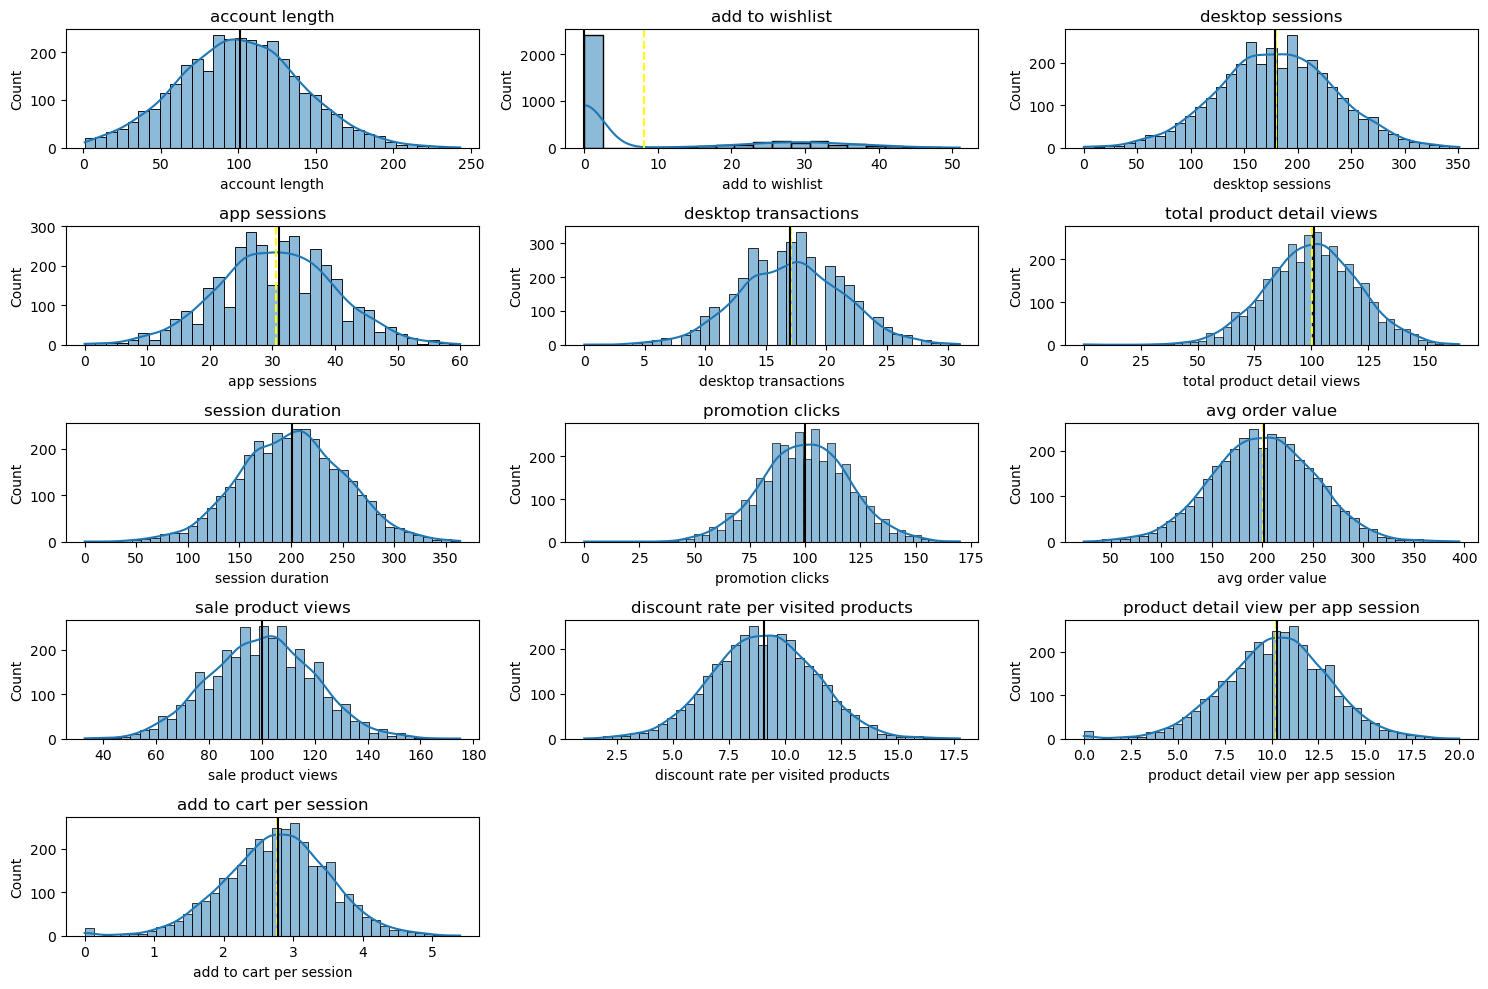

In [212]:
#Creating distribution plots for continuous variables

plt.figure(figsize= (15, 10))
for i, column in enumerate(continuous_variables, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data2[column], kde=True)
    plt.axvline(data2[column].mean(), color= "yellow", linestyle="--")
    plt.axvline(data2[column].median(), color="black", linestyle="-")
    plt.title(column)
    
plt.tight_layout()
plt.show()

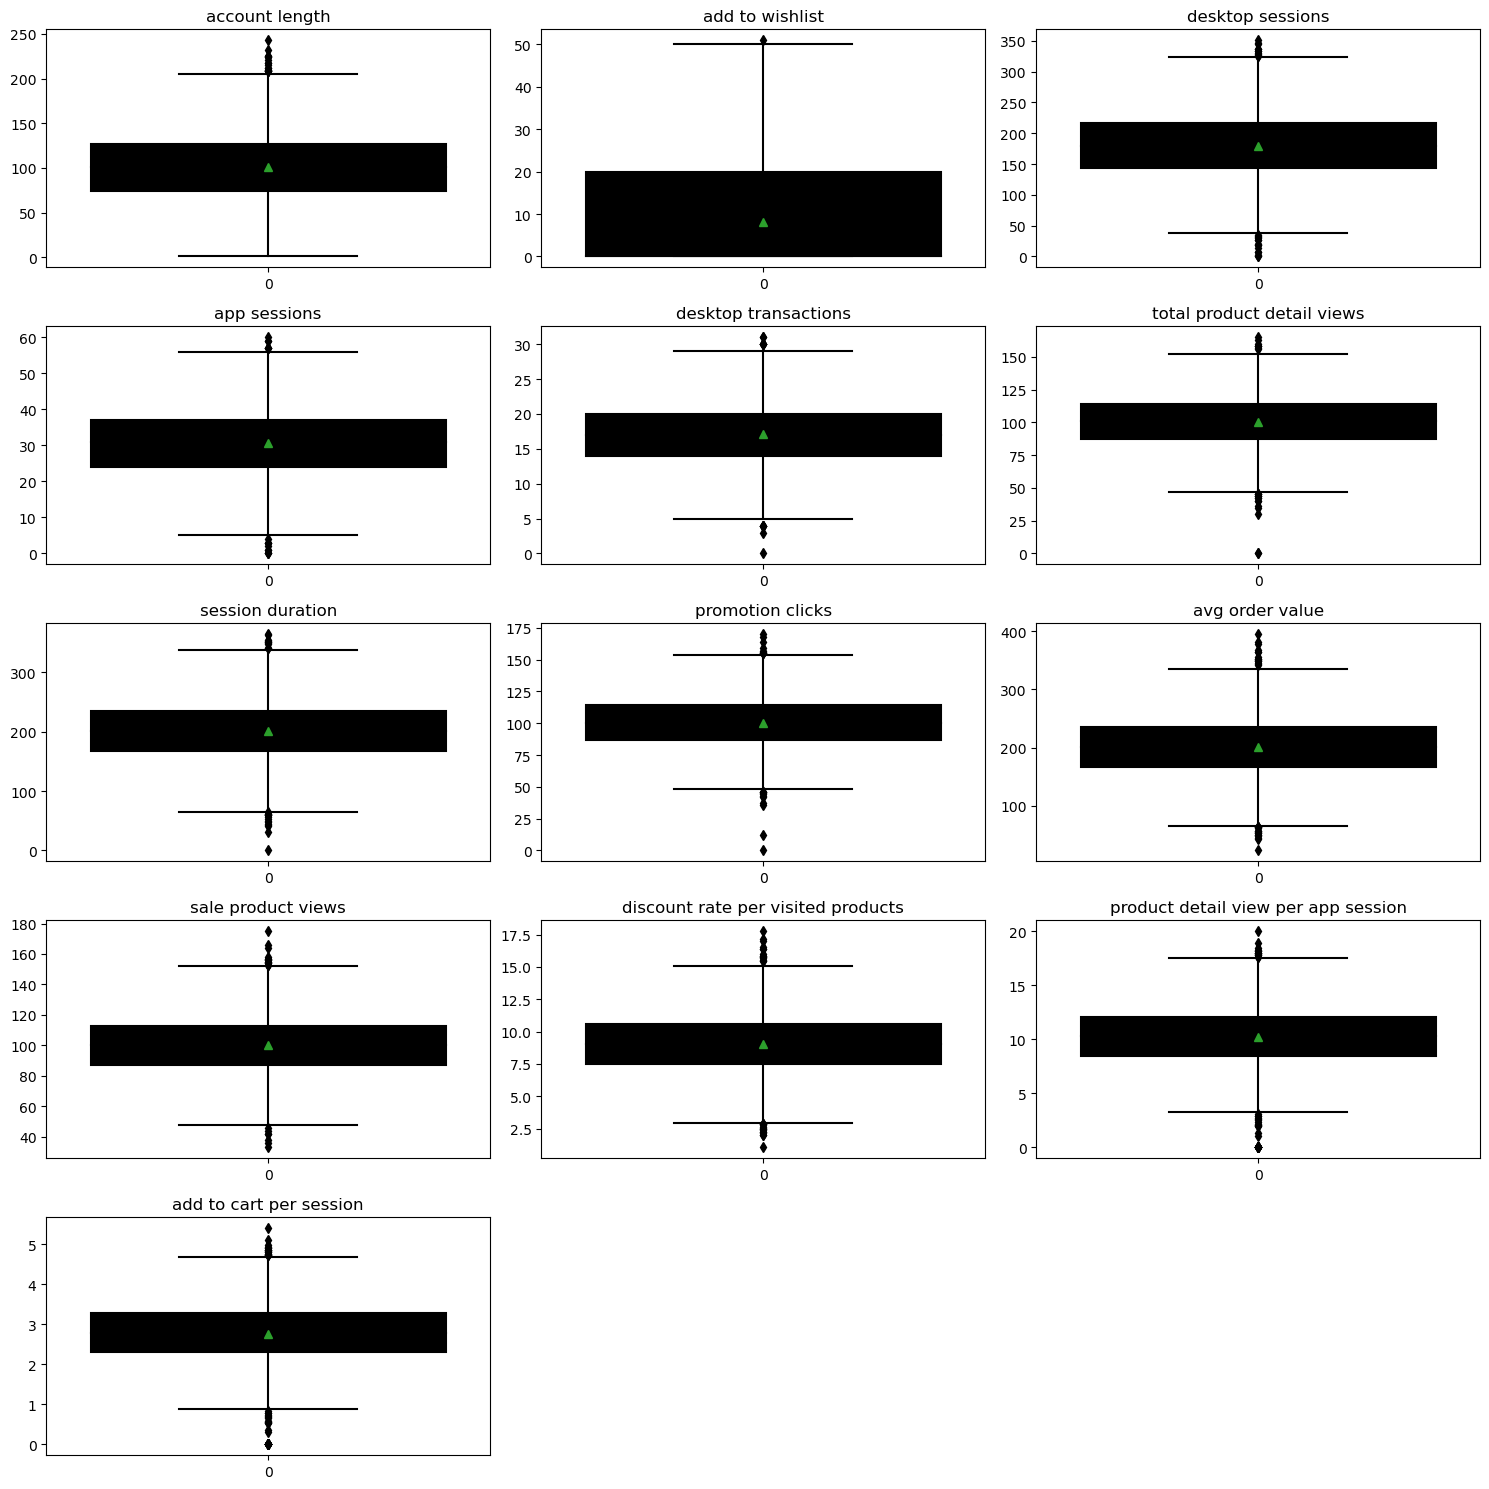

In [213]:
# Creating boxplot for the continuous variables

plt.figure(figsize=(15,15))
for i, column in enumerate(continuous_variables, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data2[column], showmeans=True, color="black")
    plt.title(column)
plt.tight_layout()
plt.show()

In [214]:
tenure_churn_no= data2[data2["churn"] == 0]["account length"]
tenure_churn_yes= data2[data2["churn"] == 1]["account length"]

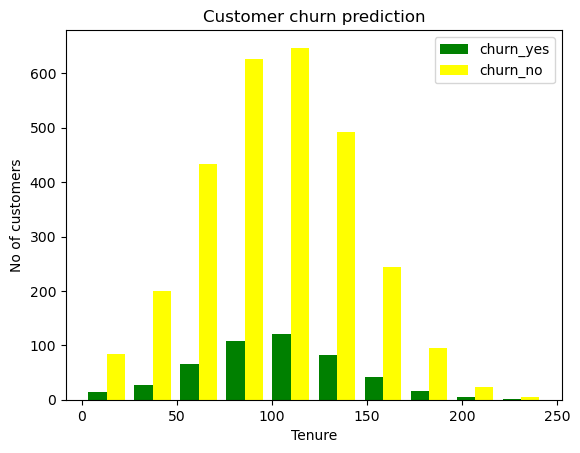

In [215]:
#Comparing account length with no of customers who churned
plt.hist([tenure_churn_yes, tenure_churn_no], 
         color= ["green", "yellow"], label=['churn_yes', 'churn_no'])
plt.xlabel('Tenure')
plt.ylabel('No of customers')
plt.title("Customer churn prediction")
plt.legend()

plt.show()

In [216]:
data2.churn.value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='churn'>

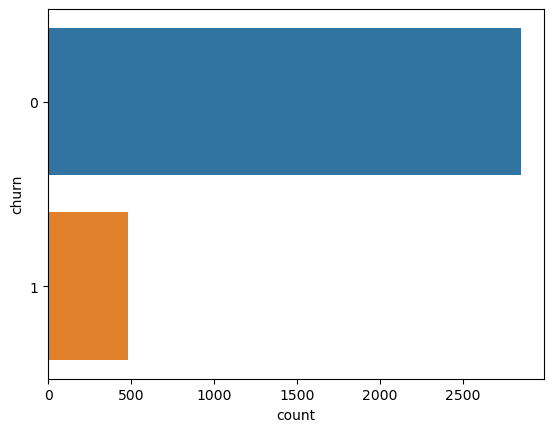

In [217]:
sns.countplot(y=data2.churn)

In [218]:
cols_to_scale= ["account length", "add to wishlist", "desktop sessions", "app sessions", "desktop transactions", 
                       "total product detail views", "session duration", "promotion clicks", "avg order value", 
                       "sale product views", "discount rate per visited products", "product detail view per app session",
                       "add to cart per session", "app transactions", "customer service calls"]

scaler= Normalizer()
data2[cols_to_scale]= scaler.fit_transform(data2[cols_to_scale])

In [219]:
data2

,account length,location code,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,0.275142,415,0,1,0.053739,0.569631,0.096730,0.036542,0.236451,0.423461,0.187011,0.525995,0.195609,0.023667,0.021496,0.006449,0.005804,0.002150,0
1,0.252755,415,0,1,0.061417,0.382676,0.063779,0.040157,0.290551,0.462991,0.243307,0.600944,0.243307,0.027047,0.032362,0.007087,0.008740,0.002362,0
2,0.345945,415,0,0,0.000000,0.613611,0.103531,0.025251,0.287867,0.305543,0.277766,0.410589,0.262615,0.018484,0.030807,0.012626,0.008308,0.000000,0
3,0.208327,408,1,0,0.000000,0.741543,0.126484,0.012400,0.176086,0.153765,0.218247,0.488327,0.220727,0.021973,0.016369,0.017361,0.004415,0.004960,0
4,0.205041,415,1,0,0.000000,0.456559,0.076549,0.035541,0.308929,0.404615,0.333534,0.510963,0.330800,0.022992,0.027612,0.008202,0.007464,0.008202,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.412072,415,0,1,0.077263,0.334808,0.057948,0.038632,0.165258,0.463580,0.270422,0.599006,0.178135,0.026956,0.021247,0.012877,0.005730,0.004292,0
3329,0.180912,415,0,0,0.000000,0.614569,0.103758,0.034586,0.151647,0.407052,0.146326,0.508948,0.327238,0.022907,0.025541,0.010642,0.006891,0.007981,0
3330,0.066120,510,0,0,0.000000,0.427415,0.073204,0.059035,0.257394,0.682448,0.136962,0.453155,0.214888,0.020403,0.033296,0.014168,0.008997,0.004723,0
3331,0.455551,510,1,0,0.000000,0.529825,0.089129,0.034661,0.259961,0.396131,0.207969,0.344634,0.339187,0.015499,0.012379,0.024758,0.003342,0.004952,0


In [220]:
#Seperating the dependent and independent variables
X= data2.drop("churn", axis="columns")
y= data2.churn

In [221]:
X.shape

(3333, 18)

In [222]:
#Applying SMOTE to the dataset because it is imbalnced
from imblearn.over_sampling import SMOTE

X_sm, y_sm= SMOTE().fit_resample(X, y)

In [223]:
X_sm

,account length,location code,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls
0,0.275142,415,0,1,0.053739,0.569631,0.096730,0.036542,0.236451,0.423461,0.187011,0.525995,0.195609,0.023667,0.021496,0.006449,0.005804,0.002150
1,0.252755,415,0,1,0.061417,0.382676,0.063779,0.040157,0.290551,0.462991,0.243307,0.600944,0.243307,0.027047,0.032362,0.007087,0.008740,0.002362
2,0.345945,415,0,0,0.000000,0.613611,0.103531,0.025251,0.287867,0.305543,0.277766,0.410589,0.262615,0.018484,0.030807,0.012626,0.008308,0.000000
3,0.208327,408,1,0,0.000000,0.741543,0.126484,0.012400,0.176086,0.153765,0.218247,0.488327,0.220727,0.021973,0.016369,0.017361,0.004415,0.004960
4,0.205041,415,1,0,0.000000,0.456559,0.076549,0.035541,0.308929,0.404615,0.333534,0.510963,0.330800,0.022992,0.027612,0.008202,0.007464,0.008202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,0.338792,415,0,0,0.000000,0.382068,0.064702,0.048747,0.293059,0.581899,0.285129,0.407838,0.237587,0.018353,0.027043,0.012871,0.007294,0.010135
5696,0.241351,415,0,1,0.085853,0.465718,0.079254,0.046162,0.259505,0.535995,0.234198,0.491014,0.232529,0.022101,0.024443,0.009404,0.006597,0.003843
5697,0.079182,415,0,0,0.000000,0.648647,0.110496,0.048441,0.204870,0.571686,0.144821,0.370525,0.166103,0.016675,0.020874,0.017592,0.005638,0.003762
5698,0.168227,415,0,0,0.000000,0.620227,0.105332,0.031519,0.227486,0.379569,0.200306,0.559403,0.154910,0.025164,0.024392,0.009082,0.006588,0.000000


In [224]:
y_sm.value_counts()

churn
0    2850
1    2850
Name: count, dtype: int64

In [225]:
#Splitting the data into train and test set
X_train, X_test, y_train, y_test= train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [226]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4560, 18) (1140, 18) (4560,) (1140,)


In [227]:
import xgboost as xgb

In [228]:
xgbc= xgb.XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [229]:
xgbc.fit(X_train, y_train)
y_pred= xgbc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       585
           1       0.92      0.93      0.93       555

    accuracy                           0.93      1140
   macro avg       0.93      0.93      0.93      1140
weighted avg       0.93      0.93      0.93      1140



In [230]:
accuracy_score(y_test, y_pred)

0.9263157894736842

In [239]:
#Hyperparameter tuning
parameters= {
    "max_depth": [5],
    "learning_rate": [0, 0.01, 0.05, 0.1],
    "gamma": [1,5,10],
    "scale_pos_weight": [2,5,10,20],
    "subsample": [1],
    "colsample_bytree": [1]
}
xgbc2= xgb.XGBClassifier(objective="binary:logistic")
grid_cv= GridSearchCV(xgbc2, parameters, n_jobs=-1, cv=5, scoring="roc_auc")

grid_cv.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [1], 'gamma': [1, 5, 10],
                         'learning_rate': [0, 0.01, 0.05, 0.1],
                         'max_depth': [5], 'scale_pos_weight': [2, 5, 10, 20],
                         'subsample': [1]},
             scoring='roc_auc')

In [241]:
print("The best score: " ,grid_cv.best_score_)
print("The best params: " ,grid_cv.best_params_)

The best score:  0.949826409012805
The best params:  {'colsample_bytree': 1, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'scale_pos_weight': 2, 'subsample': 1}


In [238]:
grid_cv.best_params_

{'colsample_bytree': 1,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'sclae_pos_weight': 2,
 'subsample': 1}

In [ ]:
#final_xgbc=  xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic")
final_xgbc.fit(X_train, y_train)
y_pred= final_xgbc.predict(X_test)
print(classification_report(y_test, y_pred))